In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_price.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [5]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
411,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,Hyundai,2017,"4,50,000","15,141 kms",Petrol
88,Toyota Corolla Altis Diesel D4DG,Toyota,2010,"3,51,000","38,000 kms",Diesel
58,Honda City ZX CVT,Honda,2017,"1,70,000","15,000 kms",Diesel
457,Hyundai Elite i20 Magna 1.2,Hyundai,2015,"4,05,000","28,000 kms",Petrol
533,Ford Fiesta SXi 1.6 ABS,Ford,2009,"2,50,000","56,400 kms",Petrol


In [6]:
df.shape

(892, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [8]:
df.isnull().sum()


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

# Cleaning Data

In [13]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

year is in object. Change to integer

In [14]:
df['year']=df['year'].astype(int)

In [15]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

Price has Ask for Price

In [16]:
df=df[df['Price']!='Ask For Price']

Price has commas in its prices and is in object

In [17]:
df['Price']=df['Price'].str.replace(",","")
df['Price']=df['Price'].astype(int)

In [18]:
df.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel


kms_driven has object values with kms at last.

In [19]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(",","")

In [20]:
df['kms_driven']=df['kms_driven'].astype(int)

In [21]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

name and company had spammed data...but with the previous cleaning, those rows got removed.

In [22]:
df['name']=df['name'].str.split().str.slice(0,3).str.join(" ")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    int32 
 3   Price       724 non-null    int32 
 4   kms_driven  724 non-null    int32 
 5   fuel_type   724 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.1+ KB


In [24]:
df.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


In [25]:
df=df[df['Price']<6E6]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        723 non-null    object
 1   company     723 non-null    object
 2   year        723 non-null    int32 
 3   Price       723 non-null    int32 
 4   kms_driven  723 non-null    int32 
 5   fuel_type   723 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.1+ KB


# Checking relationship of Comapny with Price

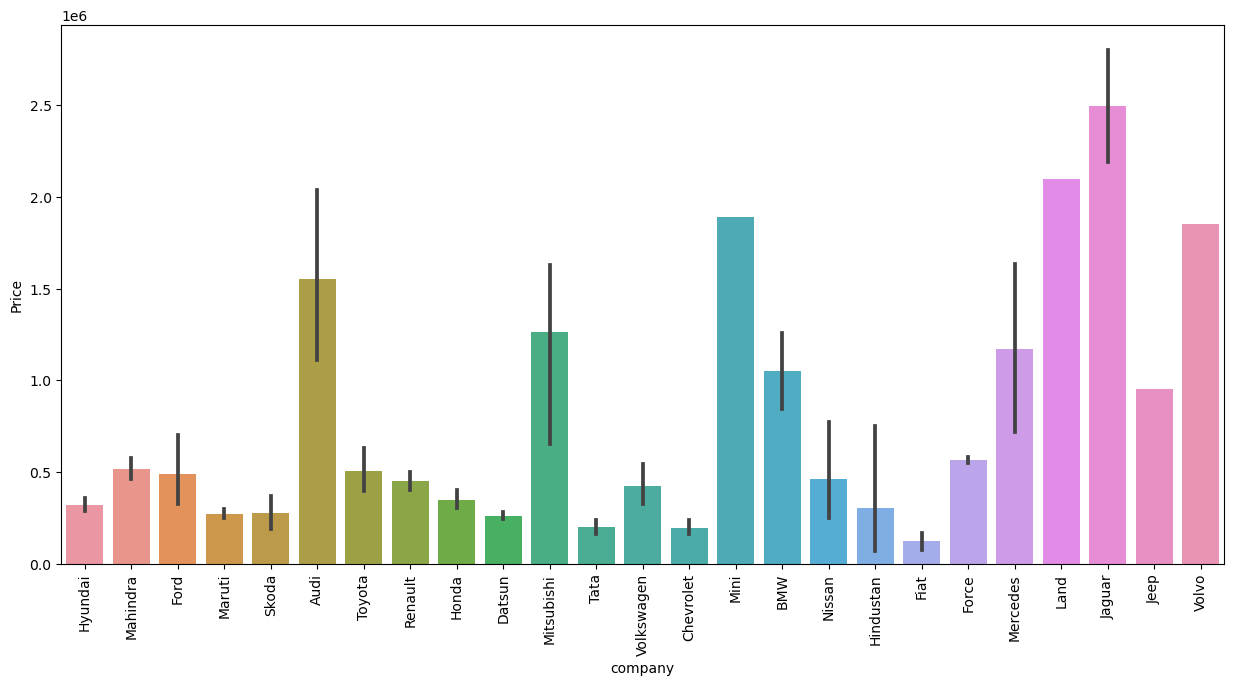

In [27]:
plt.subplots(figsize=(15,7))
sns.barplot(x=df['company'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

# Checking relationship of Year with Price

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


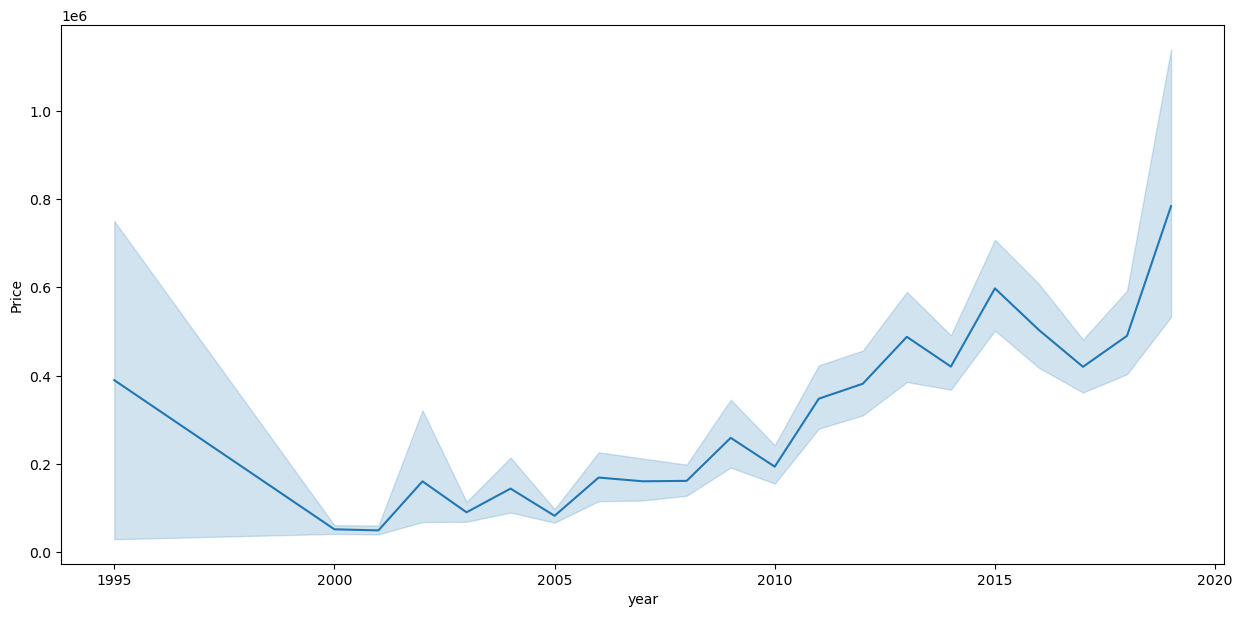

In [28]:
plt.subplots(figsize=(15,7))
sns.lineplot(x='year',y='Price',data=df)
plt.show()

In [29]:
# Checking relationship of kms_driven with Price

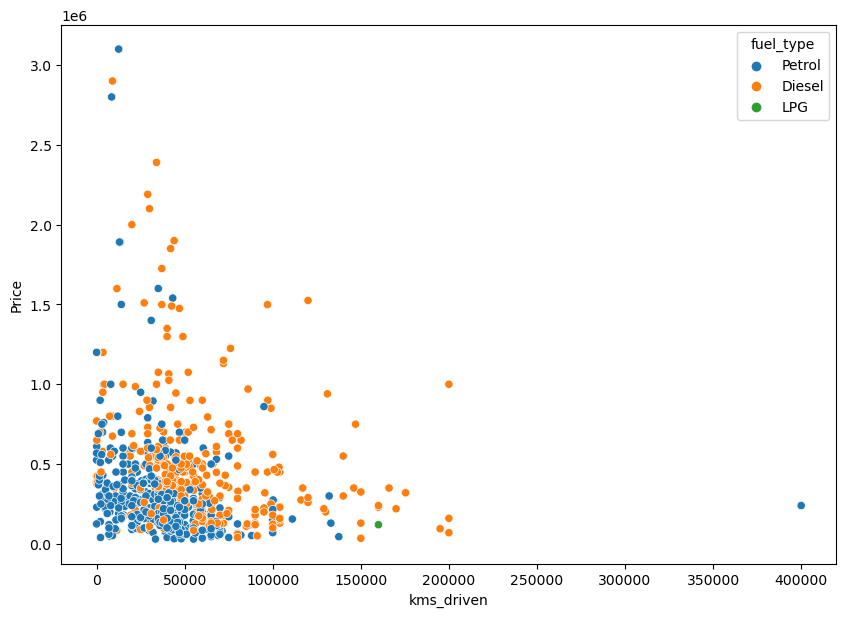

In [30]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='kms_driven',y='Price',data=df,hue='fuel_type')
plt.show()

# Checking relationship of fuel_type with Price

In [ ]:
plt.subplots(figsize=(15,7))
sns.barplot(x='company',y='Price',data=df,hue='fuel_type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
car=df.copy()

# Extracting Training Data

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

# Applying Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score 

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

# Linear regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore'),[0,1,4])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
 

# Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore'),[0,1,4])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
 

# Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore'),[0,1,4])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
